In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataframe

In [5]:
house_df = pd.read_csv(r"Bengaluru_House_Data.csv")
house_df.shape

(13320, 9)

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [7]:
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
house_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
house_df.corr()

C:\Users\a\AppData\Local\Temp\ipykernel_3688\4260001288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_df.corr()


,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


# data cleaning

In [11]:
house_df.isnull().sum()/house_df.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [12]:
house_df.drop("society", axis=1, inplace=True)

In [13]:
num_cols = house_df.select_dtypes(include=["int64","float64"])
missing_value = num_cols.isnull().sum()/num_cols.shape[0]*100
fill_value = missing_value[missing_value>0].keys()
for var in fill_value:
    num_cols[var].fillna(num_cols[var].mean(), inplace=True)

In [14]:
cat_cols = house_df.select_dtypes(include=["O"])
missing_cat_value = cat_cols.isnull().sum()/cat_cols.shape[0]*100
fill_cat_value = missing_cat_value[missing_cat_value>0].keys()
for var in fill_cat_value:
    cat_cols[var].fillna(cat_cols[var].mode()[0], inplace=True)

In [15]:
house_df.update(num_cols)
house_df.update(cat_cols)

In [16]:
house_df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [17]:
house_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [18]:
house_df.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0


In [19]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [20]:
cols = house_df.columns

In [21]:
for var in cols:
    print(house_df[var].value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Poss

# convert total_sqft string datatypes to integer

In [22]:
total_sqft_int=[]
for str_val in house_df["total_sqft"]:
    try:
        total_sqft_int.append(float(str_val))
    except:
        try:
            temp=[]
            temp=str_val.split("-")
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)
        except:
            total_sqft_int.append(np.nan)

In [23]:
df1 = house_df.reset_index(drop=True)

In [24]:
df2 = df1.join(pd.DataFrame({"total_sqft_int": total_sqft_int}))
df2.shape

(13320, 9)

# convert size string datatype to integer

In [25]:
size_int=[]
for str_val in df2["size"]:
    temp=[]
    temp=str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)

In [26]:
df3 = df2.reset_index(drop=True)

In [27]:
df4 = df3.join(pd.DataFrame({"bhk": size_int}))
df4.shape

(13320, 10)

# remove_outlier

In [28]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins=30)
    plt.title("Histogram")
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("Variable quantiles")
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.show()

******* bath *******


C:\Users\a\AppData\Local\Temp\ipykernel_3688\4087699861.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


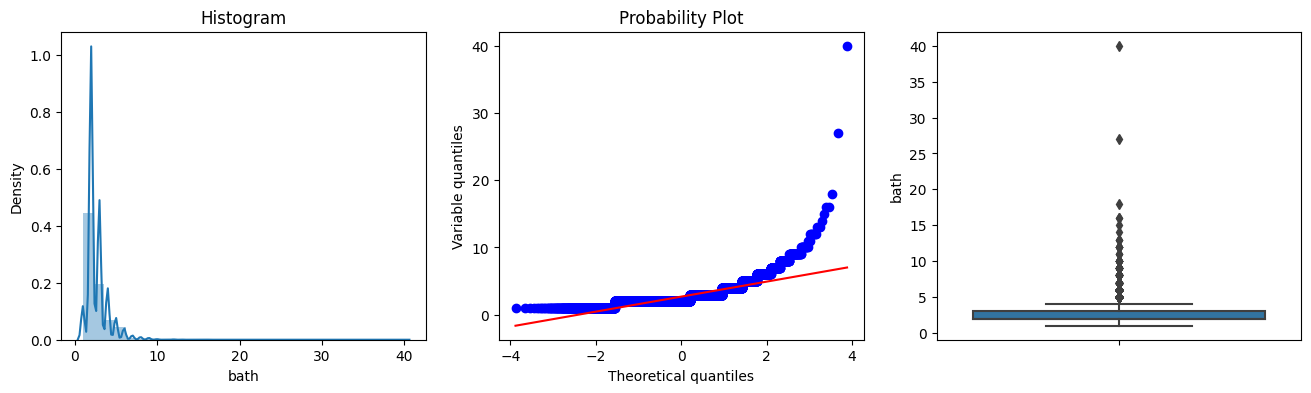

******* balcony *******


C:\Users\a\AppData\Local\Temp\ipykernel_3688\4087699861.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


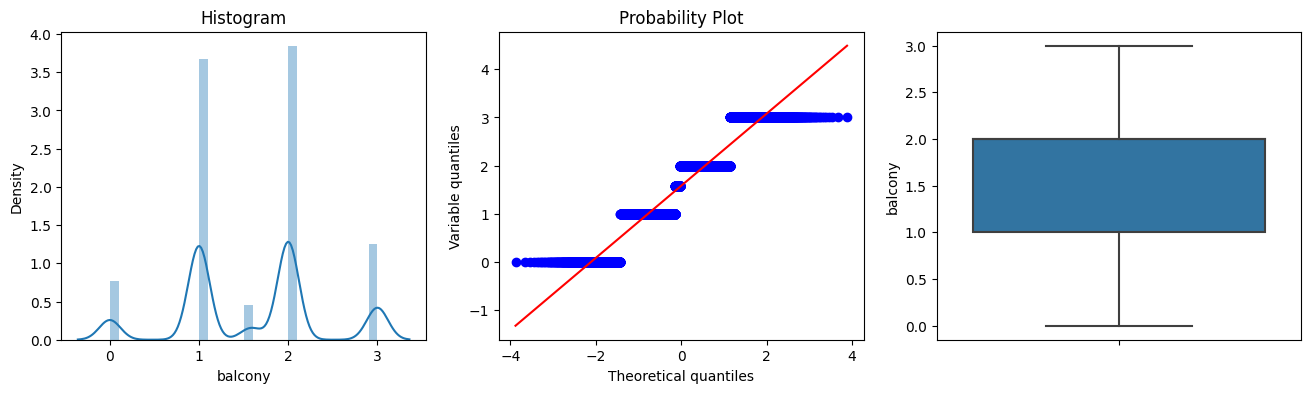

******* total_sqft_int *******


C:\Users\a\AppData\Local\Temp\ipykernel_3688\4087699861.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


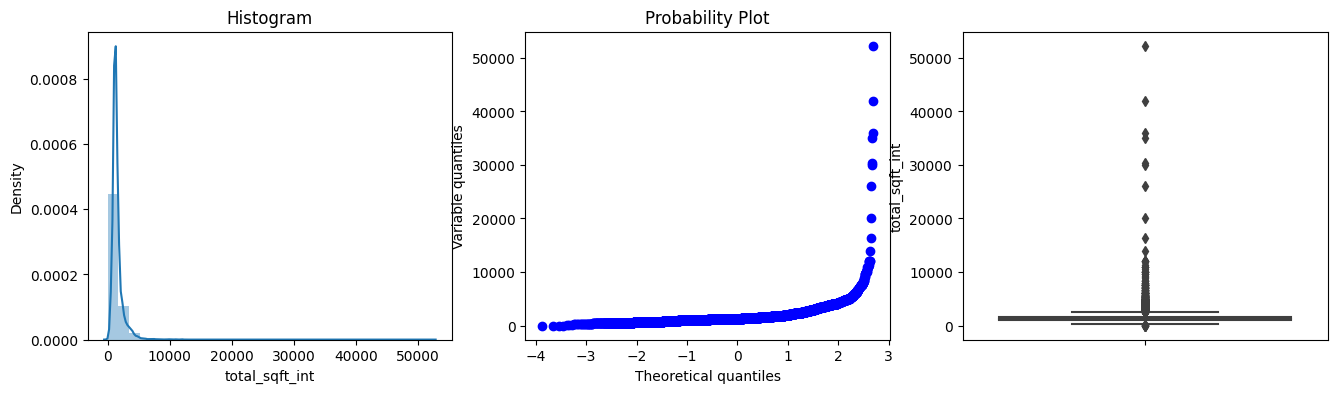

******* bhk *******


C:\Users\a\AppData\Local\Temp\ipykernel_3688\4087699861.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


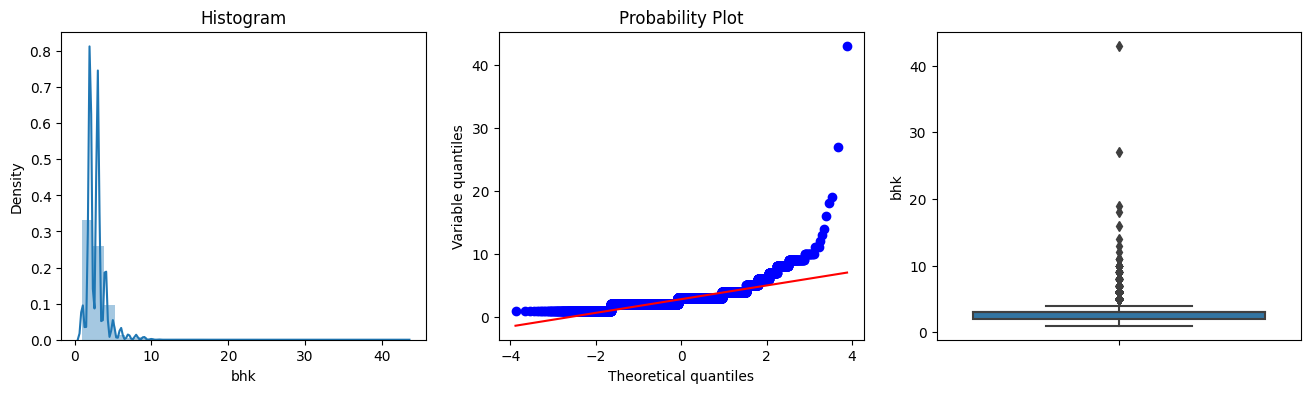

******* price *******


C:\Users\a\AppData\Local\Temp\ipykernel_3688\4087699861.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


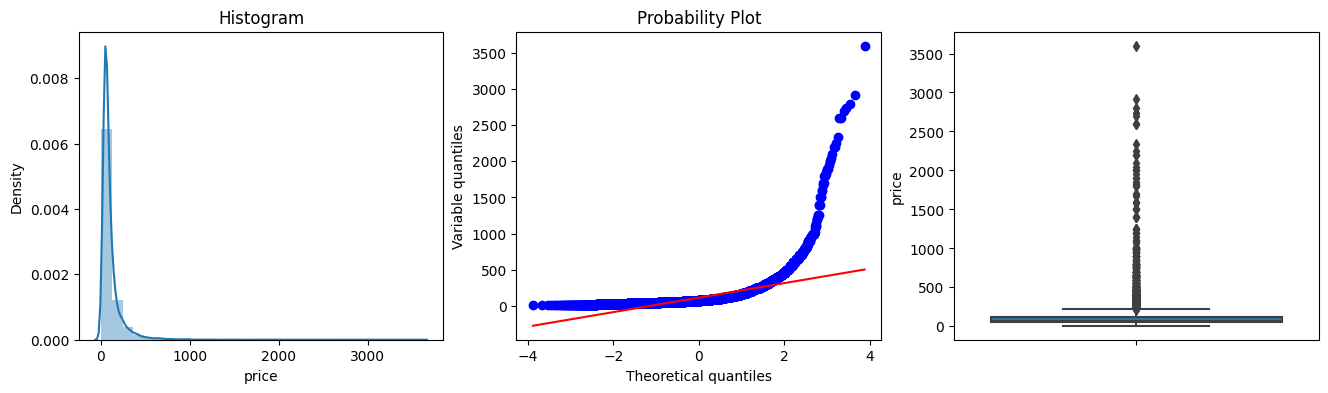

In [29]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(df4, var)

In [30]:
df5 = df4[~(df4["total_sqft_int"]/df4["bhk"] <350)]
df5.shape

(12226, 10)

In [31]:
df5["price_per_sqft"] = df5["price"]*100000 / df5["total_sqft_int"]
df5.head()

C:\Users\a\AppData\Local\Temp\ipykernel_3688\4027279943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["price_per_sqft"] = df5["price"]*100000 / df5["total_sqft_int"]


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [32]:
df5.price_per_sqft.describe()

count     12180.000000
mean       6180.567020
std        4014.487780
min         267.829813
25%        4200.000000
50%        5262.147304
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [34]:
df6 = remove_pps_outliers(df5)
df6.shape

(8951, 11)

In [35]:
df7 = df6[df6.bath <df6.bhk+2]
df7.shape

(8863, 11)

In [36]:
df7.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
bhk               0
price_per_sqft    0
dtype: int64

In [37]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
3,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,1250.0,3,3520.000000
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000


In [38]:
df7.corr()

C:\Users\a\AppData\Local\Temp\ipykernel_3688\2906877236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df7.corr()


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
bath,1.000000,0.258435,0.517867,0.655719,0.850868,0.329405
balcony,0.258435,1.000000,0.121078,0.185819,0.253867,0.043405
price,0.517867,0.121078,1.000000,0.789876,0.477627,0.717906
total_sqft_int,0.655719,0.185819,0.789876,1.000000,0.643247,0.359564
bhk,0.850868,0.253867,0.477627,0.643247,1.000000,0.272661
price_per_sqft,0.329405,0.043405,0.717906,0.359564,0.272661,1.000000


In [39]:
df8 = df7.drop(["size","total_sqft"], axis=1)
df8.head()


,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3,3520.000000
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000


# One-hot encoding

In [40]:
df8["area_type"].value_counts()

Super built-up  Area    6714
Built-up  Area          1610
Plot  Area               498
Carpet  Area              41
Name: area_type, dtype: int64

In [41]:
num_val = ["Super built-up  Area","Built-up  Area","Plot  Area","Carpet  Area"]

In [42]:
df9 = df8.copy()
for var in num_val:
    df9["area_type_"+var] = np.where(df9["area_type"]==var,1,0)

In [43]:
df9.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Super built-up Area,area_type_Built-up Area,area_type_Plot Area,area_type_Carpet Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,0
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3,3520.000000,1,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,0


In [44]:
df9["availability"].value_counts()

Ready To Move           6891
18-Dec                   249
18-May                   201
18-Apr                   191
18-Aug                   153
19-Dec                   134
18-Jul                   112
18-Mar                    88
21-Dec                    86
20-Dec                    68
18-Jun                    65
19-Mar                    62
18-Feb                    40
18-Nov                    39
18-Sep                    36
18-Oct                    31
19-Jun                    27
18-Jan                    23
19-Jan                    22
20-Jan                    21
17-Oct                    19
17-Dec                    19
19-Sep                    16
21-Mar                    14
19-Jul                    13
21-Jun                    13
19-Aug                    13
19-Apr                    12
21-Jan                    12
17-Jun                    12
17-Jul                    11
20-Jun                    10
21-May                     9
19-Oct                     8
17-Sep        

In [45]:
df9["availability_Ready To Move"] = np.where(df9["availability"]=="Ready To Move",1,0)

In [46]:
df9.shape

(8863, 14)

In [47]:
df9.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Super built-up Area,area_type_Built-up Area,area_type_Plot Area,area_type_Carpet Area,availability_Ready To Move
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,0,1
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,0,1
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,0,1
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3,3520.000000,1,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,0,1


In [48]:
df9["location"].value_counts()

Whitefield                             479
Sarjapur  Road                         293
Electronic City                        268
Kanakpura Road                         195
Yelahanka                              168
Uttarahalli                            149
Marathahalli                           149
Thanisandra                            149
Bannerghatta Road                      143
Raja Rajeshwari Nagar                  134
Hennur Road                            132
Haralur Road                           123
Electronic City Phase II               119
Hebbal                                 109
7th Phase JP Nagar                     101
Chandapura                              71
KR Puram                                70
Rajaji Nagar                            69
Bellandur                               69
Kasavanhalli                            69
Sarjapur                                66
Yeshwanthpur                            65
Begur Road                              63
Banashankar

In [49]:
number_cols = df9["location"].value_counts()
convert_cols = number_cols[number_cols>20].keys()
convert_cols

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Yelahanka', 'Uttarahalli', 'Marathahalli', 'Thanisandra',
       'Bannerghatta Road', 'Raja Rajeshwari Nagar',
       ...
       '9th Phase JP Nagar', 'Tumkur Road', 'Kalena Agrahara', 'Choodasandra',
       'Mahadevpura', 'Babusapalaya', 'Gunjur', 'Iblur Village', 'Seegehalli',
       'Chikkalasandra'],
      dtype='object', length=106)

In [50]:
df10=df9.copy()

In [51]:
for var in convert_cols:
    df10["location_"+var] = np.where(df10["location"]==var,1,0)

C:\Users\a\AppData\Local\Temp\ipykernel_3688\2718898707.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df10["location_"+var] = np.where(df10["location"]==var,1,0)
C:\Users\a\AppData\Local\Temp\ipykernel_3688\2718898707.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df10["location_"+var] = np.where(df10["location"]==var,1,0)
C:\Users\a\AppData\Local\Temp\ipykernel_3688\2718898707.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [52]:
df10.shape

(8863, 120)

In [53]:
df10.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Super built-up Area,area_type_Built-up Area,area_type_Plot Area,area_type_Carpet Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Thanisandra,location_Bannerghatta Road,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Haralur Road,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Chandapura,location_KR Puram,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Sarjapur,location_Yeshwanthpur,location_Begur Road,location_Banashankari,location_Electronics City Phase 1,location_Kothanur,location_Hormavu,location_Jakkur,location_Kengeri,location_Hoodi,location_Koramangala,location_Harlur,location_JP Nagar,location_Ramagondanahalli,location_TC Palaya,location_Ramamurthy Nagar,location_Kaggadasapura,location_Akshaya Nagar,location_Varthur,location_Budigere,location_Hennur,location_Thigalarapalya,location_HSR Layout,location_Hulimavu,location_Bisuvanahalli,location_8th Phase JP Nagar,location_Jigani,location_Kundalahalli,location_Malleshwaram,location_Brookefield,location_Rachenahalli,location_Indira Nagar,location_Gottigere,location_Vittasandra,location_Balagere,location_Hosa Road,location_Nagarbhavi,location_Bhoganhalli,location_Kudlu Gate,location_Channasandra,location_Devanahalli,location_Mysore Road,location_Jalahalli,location_Old Madras Road,location_Hegde Nagar,location_Vijayanagar,location_Yelahanka New Town,location_Kadugodi,location_Attibele,location_Sahakara Nagar,location_Old Airport Road,location_Panathur,location_Bommasandra,location_5th Phase JP Nagar,location_Green Glen Layout,location_Hosur Road,location_Kanakapura,location_CV Raman Nagar,location_Subramanyapura,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Talaghattapura,location_Kudlu,location_Ananth Nagar,location_Kengeri Satellite Town,location_Anekal,location_Hebbal Kempapura,location_Lakshminarayana Pura,location_Doddathoguru,location_R.T. Nagar,location_Horamavu Agara,location_BTM 2nd Stage,location_Vidyaranyapura,location_Kammasandra,location_Horamavu Banaswadi,location_9th Phase JP Nagar,location_Tumkur Road,location_Kalena Agrahara,location_Choodasandra,location_Mahadevpura,location_Babusapalaya,location_Gunjur,location_Iblur Village,location_Seegehalli,location_Chikkalasandra
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3,3520.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# main dataframe create

In [54]:
house_price_df = df10.drop(["area_type","availability","location"], axis=1)
house_price_df.head()


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Super built-up Area,area_type_Built-up Area,area_type_Plot Area,area_type_Carpet Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Thanisandra,location_Bannerghatta Road,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Haralur Road,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Chandapura,location_KR Puram,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Sarjapur,location_Yeshwanthpur,location_Begur Road,location_Banashankari,location_Electronics City Phase 1,location_Kothanur,location_Hormavu,location_Jakkur,location_Kengeri,location_Hoodi,location_Koramangala,location_Harlur,location_JP Nagar,location_Ramagondanahalli,location_TC Palaya,location_Ramamurthy Nagar,location_Kaggadasapura,location_Akshaya Nagar,location_Varthur,location_Budigere,location_Hennur,location_Thigalarapalya,location_HSR Layout,location_Hulimavu,location_Bisuvanahalli,location_8th Phase JP Nagar,location_Jigani,location_Kundalahalli,location_Malleshwaram,location_Brookefield,location_Rachenahalli,location_Indira Nagar,location_Gottigere,location_Vittasandra,location_Balagere,location_Hosa Road,location_Nagarbhavi,location_Bhoganhalli,location_Kudlu Gate,location_Channasandra,location_Devanahalli,location_Mysore Road,location_Jalahalli,location_Old Madras Road,location_Hegde Nagar,location_Vijayanagar,location_Yelahanka New Town,location_Kadugodi,location_Attibele,location_Sahakara Nagar,location_Old Airport Road,location_Panathur,location_Bommasandra,location_5th Phase JP Nagar,location_Green Glen Layout,location_Hosur Road,location_Kanakapura,location_CV Raman Nagar,location_Subramanyapura,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Talaghattapura,location_Kudlu,location_Ananth Nagar,location_Kengeri Satellite Town,location_Anekal,location_Hebbal Kempapura,location_Lakshminarayana Pura,location_Doddathoguru,location_R.T. Nagar,location_Horamavu Agara,location_BTM 2nd Stage,location_Vidyaranyapura,location_Kammasandra,location_Horamavu Banaswadi,location_9th Phase JP Nagar,location_Tumkur Road,location_Kalena Agrahara,location_Choodasandra,location_Mahadevpura,location_Babusapalaya,location_Gunjur,location_Iblur Village,location_Seegehalli,location_Chikkalasandra
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,3.0,44.0,1250.0,3,3520.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
house_price_df["total_sqft_int"].fillna(house_price_df["total_sqft_int"].mean(), inplace=True)

In [56]:
house_price_df.to_csv("preprocessing_main_house_prediction_file.csv", index=False)

In [57]:
house_price_df.isnull().sum().sum()

0

In [58]:
house_price_df.shape

(8863, 117)

In [59]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 8950
Columns: 117 entries, bath to location_Chikkalasandra
dtypes: float64(5), int32(111), int64(1)
memory usage: 4.2 MB


In [60]:
house_price_df.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Super built-up Area,area_type_Built-up Area,area_type_Plot Area,area_type_Carpet Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Thanisandra,location_Bannerghatta Road,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Haralur Road,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Chandapura,location_KR Puram,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Sarjapur,location_Yeshwanthpur,location_Begur Road,location_Banashankari,location_Electronics City Phase 1,location_Kothanur,location_Hormavu,location_Jakkur,location_Kengeri,location_Hoodi,location_Koramangala,location_Harlur,location_JP Nagar,location_Ramagondanahalli,location_TC Palaya,location_Ramamurthy Nagar,location_Kaggadasapura,location_Akshaya Nagar,location_Varthur,location_Budigere,location_Hennur,location_Thigalarapalya,location_HSR Layout,location_Hulimavu,location_Bisuvanahalli,location_8th Phase JP Nagar,location_Jigani,location_Kundalahalli,location_Malleshwaram,location_Brookefield,location_Rachenahalli,location_Indira Nagar,location_Gottigere,location_Vittasandra,location_Balagere,location_Hosa Road,location_Nagarbhavi,location_Bhoganhalli,location_Kudlu Gate,location_Channasandra,location_Devanahalli,location_Mysore Road,location_Jalahalli,location_Old Madras Road,location_Hegde Nagar,location_Vijayanagar,location_Yelahanka New Town,location_Kadugodi,location_Attibele,location_Sahakara Nagar,location_Old Airport Road,location_Panathur,location_Bommasandra,location_5th Phase JP Nagar,location_Green Glen Layout,location_Hosur Road,location_Kanakapura,location_CV Raman Nagar,location_Subramanyapura,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Talaghattapura,location_Kudlu,location_Ananth Nagar,location_Kengeri Satellite Town,location_Anekal,location_Hebbal Kempapura,location_Lakshminarayana Pura,location_Doddathoguru,location_R.T. Nagar,location_Horamavu Agara,location_BTM 2nd Stage,location_Vidyaranyapura,location_Kammasandra,location_Horamavu Banaswadi,location_9th Phase JP Nagar,location_Tumkur Road,location_Kalena Agrahara,location_Choodasandra,location_Mahadevpura,location_Babusapalaya,location_Gunjur,location_Iblur Village,location_Seegehalli,location_Chikkalasandra
count,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000
mean,2.419768,1.601299,92.269095,1493.954019,2.531987,5666.732607,0.757531,0.181654,0.056189,0.0

# data visulization

In [61]:
house_price_df.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Super built-up Area,area_type_Built-up Area,area_type_Plot Area,area_type_Carpet Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Thanisandra,location_Bannerghatta Road,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Haralur Road,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Chandapura,location_KR Puram,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Sarjapur,location_Yeshwanthpur,location_Begur Road,location_Banashankari,location_Electronics City Phase 1,location_Kothanur,location_Hormavu,location_Jakkur,location_Kengeri,location_Hoodi,location_Koramangala,location_Harlur,location_JP Nagar,location_Ramagondanahalli,location_TC Palaya,location_Ramamurthy Nagar,location_Kaggadasapura,location_Akshaya Nagar,location_Varthur,location_Budigere,location_Hennur,location_Thigalarapalya,location_HSR Layout,location_Hulimavu,location_Bisuvanahalli,location_8th Phase JP Nagar,location_Jigani,location_Kundalahalli,location_Malleshwaram,location_Brookefield,location_Rachenahalli,location_Indira Nagar,location_Gottigere,location_Vittasandra,location_Balagere,location_Hosa Road,location_Nagarbhavi,location_Bhoganhalli,location_Kudlu Gate,location_Channasandra,location_Devanahalli,location_Mysore Road,location_Jalahalli,location_Old Madras Road,location_Hegde Nagar,location_Vijayanagar,location_Yelahanka New Town,location_Kadugodi,location_Attibele,location_Sahakara Nagar,location_Old Airport Road,location_Panathur,location_Bommasandra,location_5th Phase JP Nagar,location_Green Glen Layout,location_Hosur Road,location_Kanakapura,location_CV Raman Nagar,location_Subramanyapura,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Talaghattapura,location_Kudlu,location_Ananth Nagar,location_Kengeri Satellite Town,location_Anekal,location_Hebbal Kempapura,location_Lakshminarayana Pura,location_Doddathoguru,location_R.T. Nagar,location_Horamavu Agara,location_BTM 2nd Stage,location_Vidyaranyapura,location_Kammasandra,location_Horamavu Banaswadi,location_9th Phase JP Nagar,location_Tumkur Road,location_Kalena Agrahara,location_Choodasandra,location_Mahadevpura,location_Babusapalaya,location_Gunjur,location_Iblur Village,location_Seegehalli,location_Chikkalasandra
bath,1.000000,0.258435,0.517867,0.655719,0.850868,0.329405,-0.109605,0.033578,0.143842,0.013309,0.024650,0.034352,0.031597,-0.072625,-0.015421,-0.012813,-0.056433,0.024266,0.006360,-0.003195,-0.023162,0.012053,-0.013575,-0.038438,0.060268,-0.004256,-0.067769,-0.010978,0.060126,0.001568,0.019264,-0.010849,-0.011357,-0.029205,-0.013846,-0.029999,0.011770,-0.023362,0.016110,-0.038017,0.007266,0.014233,0.018626,-0.002674,-0.002082,-0.023312,-0.014155,-0.012324,0.009653,-0.018508,-0.000889,-0.020396,0.078597,-0.014137,-0.023067,-0.034553,-0.008968,0.011742,0.020084,0.047432,0.016291,-0.017445,0.045475,-0.014151,-0.018222,-0.050608,-0.011411,-0.012781,0.038858,-0.000876,-0.009951,-0.016800,-0.014844,-0.000585,0.002506,0.052737,-0.001861,-0.040877,0.005694,-0.060860,-0.011294,0.065056,-0.021969,-0.012809,-0.012049,0.039192,0.010065,-0.022528,-0.020114,-0.012873,0.064157,0.044482,-0.014545,0.027265,-0.023811,-0.026319,-0.033465,-0.048822,0.058680,-0.023227,-0.018108,0.022846,-0.020667,0.000903,-0.014784,-0.027359,-0.016666,-0.008647,-0.003301,-0.011320,-0.000628,-0.013993,-0.018645,-0.004966,0.096260,0.016921,-0.024117
balcony,0.258435,1.000000,0.121078,0.185819,0.253867,0.043405,0.128150,-0.052709,-0.148785,-0.004962,0.151277,-0.001610,-0.001489,-0.076890,0.031722,0.000784,0.000460,0.033827,-0.026490,-0.019016,0.025729,-0.028240,0.034541,-0.042173,0.009290,-0.003741,-0.028579,-0.033403,0.024561,0.027870,0.029245,-0.022155,0.009238,0.058325,0.026942,-0.032789,0.037554,-0.025166,-0.012401,-

In [62]:
X = house_price_df.drop("price", axis=1)
y = house_price_df["price"]
print("shape of X=", X.shape)
print("shape of y-", y.shape)

shape of X= (8863, 116)
shape of y- (8863,)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)
print("shape of X_train=", X_train.shape)
print("shape of y_train=", y_train.shape)
print("shape of X_test=", X_test.shape)
print("shape of y_test=", y_test.shape)

shape of X_train= (6647, 116)
shape of y_train= (6647,)
shape of X_test= (2216, 116)
shape of y_test= (2216,)


# scalling data

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train, y_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# model build

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# root means square error

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

# linear model

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8810397265291149

# ridge, lasso linear model

In [69]:
from sklearn.linear_model import Ridge, Lasso
lr_rd = Ridge()
lr_rd.fit(X_train, y_train)
lr_rd.score(X_test, y_test)

0.8810069185982151

In [70]:
lr_lc = Lasso(alpha=0.3)
lr_lc.fit(X_train, y_train)
lr_lc.score(X_test, y_test)

0.882838613334565

# Support vector regression

In [71]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_reg.score(X_test, y_test)

0.32440205415345436

# random forest regression

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200, random_state=123)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9534245258147083

In [73]:
rfr_rmse = rmse(y_test, y_pred)
rfr_rmse

23.08939450478639

# Desion tree regression

In [74]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.9228351306302682

# KNN regression

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.8854192754603885

# Cross validation

In [76]:
from# sklearn.model_selection import cross_val_score
cvs = cross_val_score(rfr, X=X_train, y=y_train, cv=10)
cvs, cvs.mean()

SyntaxError: invalid syntax (1718313206.py, line 1)

# Test model

In [ ]:
X.columns

Index(['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_type_Super built-up  Area', 'area_type_Built-up  Area',
       'area_type_Plot  Area', 'area_type_Carpet  Area',
       'availability_Ready To Move',
       ...
       'location_9th Phase JP Nagar', 'location_Tumkur Road',
       'location_Kalena Agrahara', 'location_Choodasandra',
       'location_Mahadevpura', 'location_Babusapalaya', 'location_Gunjur',
       'location_Iblur Village', 'location_Seegehalli',
       'location_Chikkalasandra'],
      dtype='object', length=116)

In [ ]:
def house_price_prediction(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):
    x=np.zeros(len(X.columns))
    x[0]=bath
    x[1]=balcony
    x[2]=total_sqft_int
    x[3]=bhk
    x[4]=price_per_sqft
    
    if "availability"=="Ready To Move":
        x[9]=1
    
    if "area_type_"+area_type in X.columns:
        area_type_index = np.where(X.columns=="area_type_"+area_type)[0][0]
        x[area_type_index]=1
        
    if "location_"+location in X.columns:
        loc_index = np.where(X.columns=="location_"+location)[0][0]
        x[loc_index]=1
        
    x = sc.transform([x])[0]
    
    return model.predict([x])[0]

# save model

In [77]:
import joblib

In [78]:
joblib.dump(rfr, "house_price_prediction_model.pkl")

['house_price_prediction_model.pkl']

In [79]:
house_price_prediction_model = joblib.load("house_price_prediction_model.pkl")

In [81]:
house_price_prediction(house_price_prediction_model,bath=2,balcony=3,total_sqft_int=200,bhk=2,price_per_sqft=8512.285714,area_type="Super built-up Area",availability="18-May",location="Tumkur Road")
 

NameError: name 'house_price_prediction' is not defined